## IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## MEMBACA DATASET

In [3]:
data = pd.read_csv("dataset/creditcard.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## MEMILIH DATA DARI DATASET UNTUK DIGUNAKAN SEBAGAI ATRIBUT

In [4]:
data = data[['BALANCE', 'PURCHASES']]
data.head(10)

,BALANCE,PURCHASES
0,40.900749,95.40
1,3202.467416,0.00
2,2495.148862,773.17
3,1666.670542,1499.00
4,817.714335,16.00
5,1809.828751,1333.28
6,627.260806,7091.01
7,1823.652743,436.20
8,1014.926473,861.49
9,152.225975,1281.60


## MELIHAT RINGKASAN STATISTIK

In [5]:
data.describe()

,BALANCE,PURCHASES
count,8950.000000,8950.000000
mean,1564.474828,1003.204834
std,2081.531879,2136.634782
min,0.000000,0.000000
25%,128.281915,39.635000
50%,873.385231,361.280000
75%,2054.140036,1110.130000
max,19043.138560,49039.570000


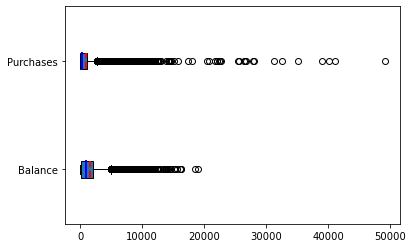

In [6]:
fig, ax = plt.subplots()
ax.boxplot(data,
          vert=False,
          showmeans=True,
          meanline=True,
          labels=('Balance','Purchases'),
          patch_artist=True,
          medianprops={'linewidth': 2, 'color':'blue'},
          meanprops={'linewidth':2, 'color':'red'})
plt.show()

## BUANG OUTLIER

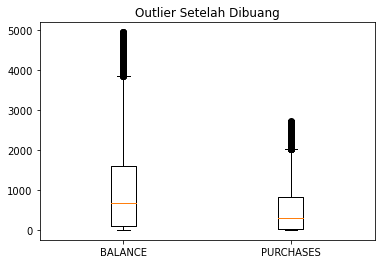

In [7]:
# Q1, Q3, dan IQR
kolom = ['BALANCE', 'PURCHASES']

Q1 = data[kolom].quantile(0.25)
Q3 = data[kolom].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[kolom] < (Q1 - 1.5 * IQR)) |
             (data[kolom] > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.boxplot(data[kolom])
plt.xticks([1, 2], kolom)
plt.title('Outlier Setelah Dibuang')
plt.show()

In [8]:
data.describe()

,BALANCE,PURCHASES
count,7590.000000,7590.000000
mean,1054.455727,542.351792
std,1173.232811,646.548508
min,0.000000,0.000000
25%,87.728941,21.225000
50%,674.399594,297.210000
75%,1593.581535,818.485000
max,4940.113918,2711.900000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7590 entries, 0 to 8949
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BALANCE    7590 non-null   float64
 1   PURCHASES  7590 non-null   float64
dtypes: float64(2)
memory usage: 177.9 KB


## MEMBUAT NILAI X

In [10]:
x_array = np.array(data)

## VISUALISASI PERSEBARAN DATA 

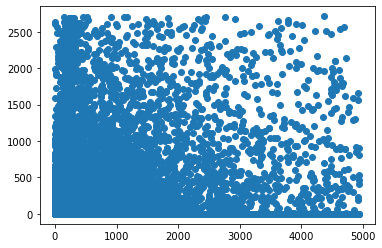

In [11]:
plt.scatter(data.BALANCE, data.PURCHASES)
plt.show()

## STANDARISASI

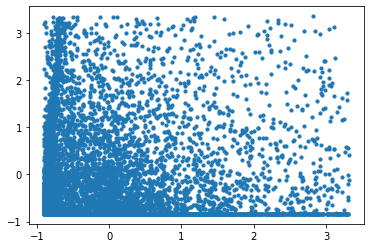

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)
plt.scatter(x_scaled[:,0], x_scaled[:,1], s=10)
plt.show()

## MODEL KMEANS 

In [13]:
from sklearn.cluster import KMeans
sse = []
index = range (1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state = 0)
    kmeans.fit(x_scaled)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print(i, sse_)

1 15179.999999999996
2 9558.023250141496
3 5080.306425436236
4 3895.701680171073
5 3020.8937091998164
6 2324.64926899889
7 1990.7922140302876
8 1717.2501347759455
9 1483.9157376363107


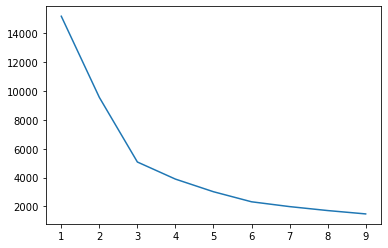

In [14]:
plt.plot(index, sse)
plt.show()

## MENENTUKAN JUMLAH CLUSTER

In [15]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [16]:
kmeans.cluster_centers_

array([[-0.44670466, -0.41780084],
       [-0.14233402,  1.71533878],
       [ 1.66782992, -0.34813453]])

# VISUALISASI : SCATTER PLOT

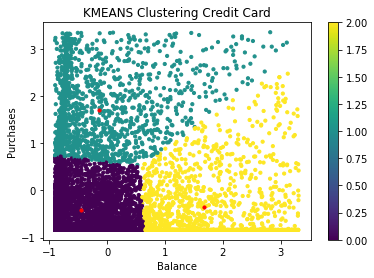

In [18]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s=10, c=kmeans.labels_)
centers = kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c='red', s=10)
plt.title("KMEANS Clustering Credit Card")
plt.xlabel("Balance")
plt.ylabel("Purchases")
plt.colorbar(output)
plt.show()

## MODEL EVALUASI : DAVIES BOULDIN SCORE

In [74]:
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
davies_bouldin_score(x_scaled, labels)

0.721943021837891